In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
##https://drive.google.com/file/d/1XByTx0O7fcH-eS02AF_inxV16qJUTTXJ/view?usp=sharing
file = drive.CreateFile({'id':'1XByTx0O7fcH-eS02AF_inxV16qJUTTXJ'}) 
file.GetContentFile('news.csv')  

**Part1: Load Data**

In [ ]:
import numpy as np
import pandas as pd
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Load data into dataframe
df = pd.read_csv('news.csv')

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Remove missing value
df.dropna(subset=['text'],inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
text_list = df['text'].tolist()

In [ ]:
text_list[0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

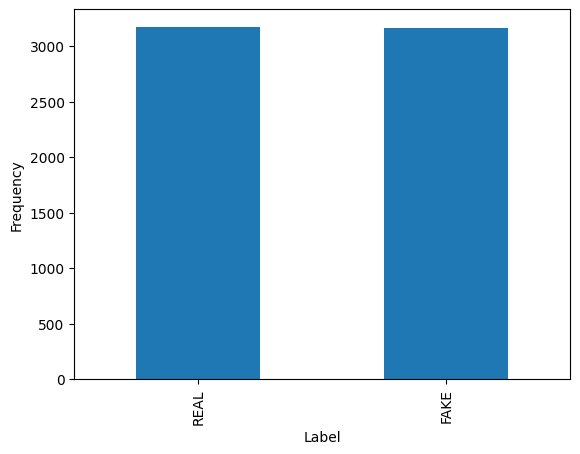

In [ ]:
#: Determine whether the dataset is a balanced dataset

frequency = df['label'].value_counts()
frequency.plot(kind = 'bar')

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

**Part2 Tokenizing and Stemming**

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') 
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>
stopwords.append("news")
stopwords.append("\n")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 184 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
### use defined function to analyze (i.e., tokenize, stem) the news
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def tokenization_and_stemming(text):
    tokens = [] 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens] 
    return stems

In [ ]:
# tokenization and stemming and Noun extraction
def tokenization_and_stemming_2(text):
    tokens = [] 
  
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
   
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens] 

    #: extract only nouns as they contain more informations
    tags = nltk.pos_tag(stems)
    nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    
    return nouns

In [ ]:
from collections import Counter

TS_List_1 = tokenization_and_stemming(text_list[0])
word_freq = Counter(TS_List_1)
print(word_freq)

Counter({'fbi': 31, 'hillari': 18, 'clinton': 18, 'comey': 11, 'investig': 8, 'email': 8, 'time': 6, 'campaign': 6, 'fear': 6, 'elect': 5, 'war': 5, 'go': 5, 'peopl': 5, 'attack': 5, 'scandal': 5, 'gone': 4, 'unpreced': 4, 'around': 4, 'jame': 4, 'media': 4, 'realli': 4, 'act': 4, 'one': 4, 'new': 3, 'focus': 3, 'polit': 3, 'director': 3, 'obama': 3, 'warn': 3, 'democrat': 3, 'claim': 3, 'accus': 3, 'kgb': 3, 'violat': 3, 'hatch': 3, 'awkward': 3, 'way': 3, 'tri': 3, 'victori': 3, 'associ': 3, 'decid': 3, 'old': 3, 'assault': 3, 'fight': 3, 'panick': 3, 'desper': 3, 'afraid': 3, 'bigger': 3, 'setup': 3, 'whatev': 3, 'york': 2, 'final': 2, 'stretch': 2, 'still': 2, 'nomine': 2, 'cnn': 2, 'everyon': 2, 'letter': 2, 'trump': 2, 'alli': 2, 'leadership': 2, 'credibl': 2, 'preemptiv': 2, 'foundat': 2, 'agent': 2, 'doj': 2, 'public': 2, 'hoover': 2, 'bizarr': 2, 'appear': 2, 'hous': 2, 'republican': 2, 'right': 2, 'conspiraci': 2, 'countless': 2, 'procedur': 2, 'know': 2, 'much': 2, 'ever': 2

In [ ]:
TS_List_2 = tokenization_and_stemming_2(text_list[0])
word_freq_2 = Counter(TS_List_2)
print(word_freq_2)

Counter({'fbi': 24, 'clinton': 17, 'hillari': 9, 'comey': 9, 'time': 6, 'campaign': 6, 'war': 5, 'peopl': 5, 'scandal': 5, 'email': 5, 'investig': 5, 'media': 4, 'act': 4, 'focus': 3, 'polit': 3, 'director': 3, 'jame': 3, 'attack': 3, 'claim': 3, 'accus': 3, 'hatch': 3, 'way': 3, 'tri': 3, 'decid': 3, 'assault': 3, 'setup': 3, 'york': 2, 'stretch': 2, 'cnn': 2, 'everyon': 2, 'letter': 2, 'trump': 2, 'leadership': 2, 'warn': 2, 'credibl': 2, 'foundat': 2, 'agent': 2, 'hoover': 2, 'bizarr': 2, 'kgb': 2, 'countless': 2, 'procedur': 2, 'awkward': 2, 'realli': 2, 'pick': 2, 'victori': 2, 'associ': 2, 'question': 2, 'strategi': 2, 'lie': 2, 'explan': 2, 'believ': 2, 'hubri': 2, 'presidenti': 2, 'reason': 2, 'fear': 2, 'clintonworld': 2, 'fire': 2, 'illeg': 2, 'cover': 2, 'year': 2, 'fellow': 1, 'freedom': 1, 'writer': 1, 'elect': 1, 'word': 1, 'parti': 1, 'coma': 1, 'wake': 1, 'hour': 1, 'hospit': 1, 'bed': 1, 'obama': 1, 'circul': 1, 'lambast': 1, 'target': 1, 'start': 1, 'ad': 1, 'form': 1

**Part3 TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(text_list) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " news and " + str(tfidf_matrix.shape[1]) + " terms.")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  war

In total, there are 6335 news and 1000 terms.


In [ ]:
tfidf_matrix

<6335x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 805808 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.03596625,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.03596625,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
## save the terms identified by TF-IDF
tf_selected_words = tfidf_model.get_feature_names_out()

In [ ]:
# print out words
tf_selected_words

**Part3.1 Word Cloud Based ON TF-IDF Score**

In [ ]:
#: Split data based on whether the data is REAL or FAKE

df_Real = df[df['label'] == 'REAL']
df_Fake = df[df['label'] == 'FAKE']

df_Real_text = df_Real['text'].tolist()
df_Fake_text = df_Fake['text'].tolist()

df.reset_index(inplace=True, drop=True)

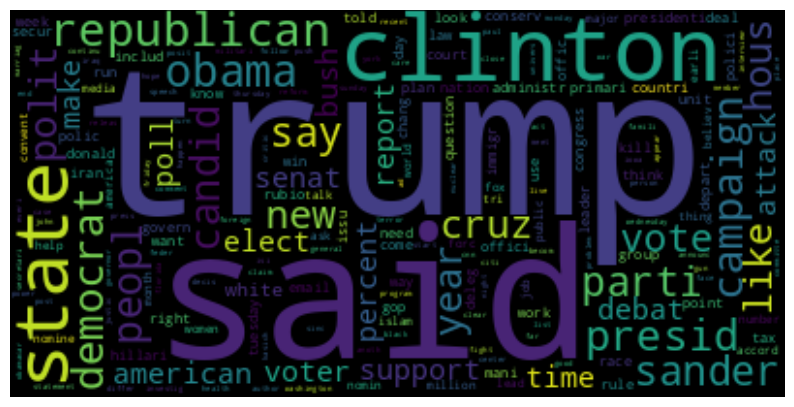

In [ ]:
#: Word Cloud based on TF-IDF score for REAL news
from wordcloud import WordCloud
tfidf_model_2 = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix_2 = tfidf_model_2.fit_transform(df_Real_text) #fit the vectorizer to synopses

selected_word_real = tfidf_model_2.get_feature_names_out()
selected_score_real = tfidf_matrix_2.toarray().sum(axis=0)
word_score_real = dict(zip(selected_word_real, selected_score_real))

wordcloud = WordCloud(background_color='black').generate_from_frequencies(word_score_real)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

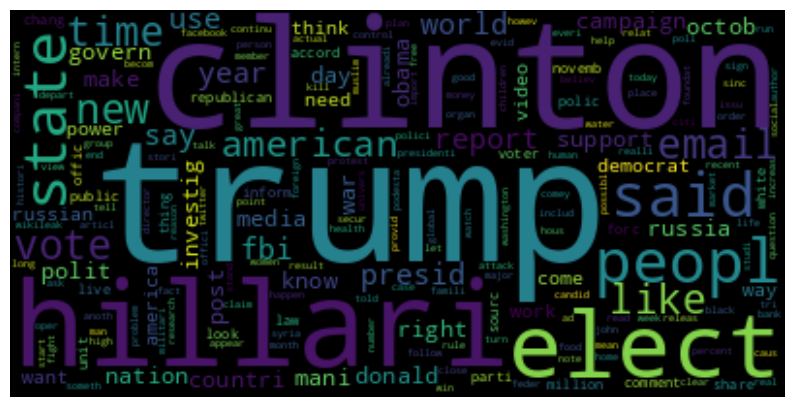

In [ ]:
#: Word Cloud based on TF-IDF score for FAKE news

tfidf_model_3 = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix_3 = tfidf_model_3.fit_transform(df_Fake_text) #fit the vectorizer to synopses

selected_word_fake = tfidf_model_3.get_feature_names_out()
selected_score_fake = tfidf_matrix_3.toarray().sum(axis=0)
word_score_fake = dict(zip(selected_word_fake, selected_score_fake))

wordcloud = WordCloud(background_color='black').generate_from_frequencies(word_score_fake)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Part4.1 Descriptive Analytics - K-means Clustering**

In [ ]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 10

# number of clusters
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Part 4.1.1 Analyze K means results**

In [ ]:
# create DataFrame films from all of the input files.
product = {'news': df.text, 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['news', 'cluster'])

In [ ]:
frame.head()

,news,cluster
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,6
2,U.S. Secretary of State John F. Kerry said Mon...,9
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,It's primary day in New York and front-runners...,5


In [ ]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
4,2196
6,934
8,890
1,868
9,394
5,328
2,291
0,247
3,129
7,58


In [ ]:
#km.cluster_centers_ denotes the importances of each items in centroid.
km.cluster_centers_

array([[0.00224884, 0.00655225, 0.00172269, ..., 0.00211244, 0.01641342,
        0.0091653 ],
       [0.00272636, 0.00519723, 0.00112523, ..., 0.00521152, 0.01685858,
        0.00742219],
       [0.00195988, 0.00676406, 0.00027977, ..., 0.0017411 , 0.00654226,
        0.00162625],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00476747, 0.00852576, 0.01155654, ..., 0.00476163, 0.00998448,
        0.0069847 ],
       [0.00395015, 0.0058398 , 0.00029943, ..., 0.00149305, 0.00592363,
        0.00508554]])

In [ ]:
km.cluster_centers_.shape

(10, 1000)

In [ ]:
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [ ]:
print ("<Document clustering result by K-means>")

<Document clustering result by K-means>


In [ ]:
#sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :15]: 
        Cluster_keywords_summary[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()

Cluster 0 words:polic,said,offic,protest,shoot,arrest,report,kill,black,peopl,depart,enforc,law,investig,shot,
Cluster 1 words:clinton,hillari,email,sander,fbi,campaign,investig,democrat,comey,said,trump,state,elect,presid,wikileak,
Cluster 2 words:russia,russian,syria,putin,war,nato,militari,syrian,said,state,ukrain,countri,forc,nuclear,world,
Cluster 3 words:iran,nuclear,deal,iranian,sanction,negoti,obama,israel,agreement,said,congress,state,weapon,presid,administr,
Cluster 4 words:peopl,said,year,time,like,use,world,report,new,state,post,make,american,day,say,
Cluster 5 words:cruz,trump,rubio,deleg,republican,bush,kasich,candid,campaign,said,iowa,debat,primari,gop,poll,
Cluster 6 words:trump,clinton,donald,said,republican,campaign,elect,vote,hillari,candid,presid,voter,support,say,parti,
Cluster 7 words:obamacar,reform,tax,list,push,kill,earli,administr,rule,obama,faith,fail,fair,famili,fall,
Cluster 8 words:vote,republican,obama,said,presid,democrat,state,parti,court,senat,hous,ele

**Part 4.2 Descriptive Analytics - LDA (Latent Dirichlet Allocation)**

In [ ]:
#: Split data based on whether the data is REAL or FAKE

df_Real = df[df['label'] == 'REAL']
df_Fake = df[df['label'] == 'FAKE']

df_Real_text = df_Real['text'].tolist()
df_Fake_text = df_Fake['text'].tolist()

df.reset_index(inplace=True, drop=True)

In [ ]:
#: Tokenizing and stemming text. Converting the text document to a matrxi of token (word) count

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df = 0.99, min_df = 0.01, stop_words = stopwords, tokenizer = tokenization_and_stemming_2)
text_matrix_Real = vectorizer.fit_transform(df_Real_text)
text_matrix_Fake = vectorizer.fit_transform(df_Fake_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['need', 'sha'] not in stop_words.
  warnings.warn(


In [ ]:
#: Fit both Real and Fake text matrix to the LDA model

from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = 10, random_state = 42)
LDA_Real = LDA.fit(text_matrix_Real)
LDA_Fake = LDA.fit(text_matrix_Fake)

print(LDA_Real.components_.shape) 
print(LDA_Fake.components_.shape)

(10, 2291)
(10, 2291)


In [ ]:
#: Print out the top 1% (23 words) for each topic in the Real text dataset

for index, topic in enumerate(LDA_Real.components_):
    print(f'The top 1% words for topic #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-23:]])

The top 1% words for topic #0
['support', 'money', 'nation', 'bill', 'hillari', 'street', 'obama', 'sander', 'parti', 'time', 'elect', 'work', 'fraud', 'report', 'ballot', 'presid', 'poll', 'campaign', 'democrat', 'voter', 'state', 'clinton', 'vote']
The top 1% words for topic #1
['group', 'oil', 'camp', 'stand', 'israel', 'day', 'mosul', 'air', 'fire', 'accord', 'forc', 'rock', 'use', 'state', 'peopl', 'land', 'pipelin', 'citi', 'attack', 'area', 'protest', 'report', 'water']
The top 1% words for topic #2
['caus', 'control', 'case', 'post', 'studi', 'report', 'act', 'brain', 'http', 'research', 'system', 'year', 'power', 'court', 'nation', 'feder', 'effect', 'drug', 'peopl', 'health', 'use', 'law', 'state']
The top 1% words for topic #3
['get', 'place', 'work', 'person', 'world', 'men', 'famili', 'food', 'school', 'use', 'home', 'help', 'cancer', 'way', 'man', 'women', 'life', 'thing', 'children', 'year', 'peopl', 'day', 'time']
The top 1% words for topic #4
['time', 'order', 'secur',

In [ ]:
#: Print out the top 1% (23 words) for each topic in the Fake text dataset

for index, topic in enumerate(LDA_Fake.components_):
    print(f'The top 1% words for topic #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-23:]])

The top 1% words for topic #0
['support', 'money', 'nation', 'bill', 'hillari', 'street', 'obama', 'sander', 'parti', 'time', 'elect', 'work', 'fraud', 'report', 'ballot', 'presid', 'poll', 'campaign', 'democrat', 'voter', 'state', 'clinton', 'vote']
The top 1% words for topic #1
['group', 'oil', 'camp', 'stand', 'israel', 'day', 'mosul', 'air', 'fire', 'accord', 'forc', 'rock', 'use', 'state', 'peopl', 'land', 'pipelin', 'citi', 'attack', 'area', 'protest', 'report', 'water']
The top 1% words for topic #2
['caus', 'control', 'case', 'post', 'studi', 'report', 'act', 'brain', 'http', 'research', 'system', 'year', 'power', 'court', 'nation', 'feder', 'effect', 'drug', 'peopl', 'health', 'use', 'law', 'state']
The top 1% words for topic #3
['get', 'place', 'work', 'person', 'world', 'men', 'famili', 'food', 'school', 'use', 'home', 'help', 'cancer', 'way', 'man', 'women', 'life', 'thing', 'children', 'year', 'peopl', 'day', 'time']
The top 1% words for topic #4
['time', 'order', 'secur',

**Part 5.1 Predictive Analytics - RNN with Word2Vec**

In [ ]:
#: Preprocessing the text

df_copy = df.copy()
df_copy['text'] = df_copy['text'].apply(tokenization_and_stemming)
df_copy = df_copy[df_copy['text'].apply(lambda doc: len(doc) > 0)]

df_copy.loc[df_copy['label'] == 'FAKE', 'label'] = 0
df_copy.loc[df_copy['label'] == 'REAL', 'label'] = 1

In [ ]:
#: Training a Word2Vec model

from gensim.models import Word2Vec

model = Word2Vec(df_copy['text'], vector_size=100, window=5, min_count=1, workers=2)
model.train(df_copy['text'], total_examples=model.corpus_count, epochs=10)

(25427750, 26110360)

In [ ]:
#: Creating feature vectors for each document

def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv.key_to_index]
    return np.mean(model.wv[doc], axis=0)

df_copy['doc_vector'] = df_copy['text'].apply(lambda x: document_vector(model, x))
df_copy = df_copy.drop(columns=['Unnamed: 0', 'title', 'text'])
df_copy.head()

,label,doc_vector
0,0,"[-0.17959371, -0.8351038, -0.6019948, -0.22588..."
1,0,"[-0.0842168, -0.60809344, -0.23326693, 0.40317..."
2,1,"[0.042592797, -0.35407063, -0.24423507, 0.1617..."
3,0,"[-0.25951535, -1.431585, -0.2741415, 0.1137877..."
4,1,"[-0.37245154, -1.447819, -0.7867591, 0.1980789..."


In [ ]:
#: Splitting Data into Training and Testing sets

from sklearn.model_selection import train_test_split

x_train_w2v, x_test_w2v, y_train_w2v, y_test_w2v = train_test_split(df_copy['doc_vector'].tolist(), df_copy['label'], test_size=0.25, stratify = df_copy['label'], random_state = 1)

In [ ]:
!pip install optuna

import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import matplotlib.pyplot as plt
class RNN(nn.Module):
    def __init__(self, i_size, h_size, n_layers, o_size, dropout=0.1, bidirectional=True):
        super(RNN, self).__init__()
        self.num_directions = bidirectional+1
        self.rnn = nn.LSTM(
            input_size=i_size,
            hidden_size=h_size,
            num_layers=n_layers,
            dropout=dropout,
            bidirectional=bidirectional
        )
        self.out = nn.Linear(h_size, o_size)

    def forward(self, x, h_state):
        r_out, hidden_state = self.rnn(x, h_state)
        
        hidden_size = hidden_state[-1].size(-1)
        r_out = r_out.view(-1, self.num_directions, hidden_size)
        outs = self.out(r_out)
        
        return outs, hidden_state

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
# Globals
INPUT_SIZE = 100
HIDDEN_SIZE = 128
NUM_LAYERS = 3
OUTPUT_SIZE = 1
BATCH_SIZE = 128
# Hyper parameters
learning_rate = 0.001
num_epochs = 300

rnn = RNN(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, bidirectional=False)

optimiser = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.BCEWithLogitsLoss()

hidden_state = None

In [ ]:
# Convert the data to the appropriate format

y_train_w2v = y_train_w2v.astype('int')
y_test_w2v = y_test_w2v.astype('int')

X_train_tensor = torch.tensor(np.array(x_train_w2v)).float()
y_train_tensor = torch.tensor(np.array(y_train_w2v)).float()

X_test_tensor = torch.tensor(np.array(x_test_w2v)).float()
y_test_tensor = torch.tensor(np.array(y_test_w2v)).float()

inputs_tensor = X_train_tensor
labels_tensor = y_train_tensor

device = torch.device('cpu')
inputs_tensor = inputs_tensor.to(device)
labels_tensor = labels_tensor.to(device)

for epoch in range(num_epochs):
    rnn.train()
    output, _ = rnn(inputs_tensor, hidden_state)

    loss = criterion(output[:, 0, :].view(-1), labels_tensor)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

In [ ]:
#： Tuning the parameters

def objective(trial):
  
    hidden_size = trial.suggest_categorical("hidden_size", [64, 128, 256])
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_uniform("dropout", 0.0, 0.5)

    rnn = RNN(INPUT_SIZE, hidden_size, num_layers, OUTPUT_SIZE, dropout=dropout, bidirectional=False)

    device = torch.device('cpu')
    rnn = rnn.to(device)

    optimizer = optim.Adam(rnn.parameters(), lr=learning_rate)
    criterion = nn.BCEWithLogitsLoss()

    history = []
    for epoch in range(num_epochs):
        rnn.train()
        optimizer.zero_grad()
        output, _ = rnn(inputs_tensor, hidden_state)
        loss = criterion(output[:, 0, :].view(-1), labels_tensor)
        loss.backward()
        optimizer.step()
        history.append(loss.item())

    rnn.eval()
    test_output, _ = rnn(X_test_tensor, hidden_state)
    test_loss = criterion(test_output.view(-1), y_test_tensor)
    return test_loss.item()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_loss = study.best_value
print("Best Hyperparameters: ", best_params)
print("Best Loss: ", best_loss)

best_rnn = RNN(INPUT_SIZE, best_params["hidden_size"], best_params["num_layers"], OUTPUT_SIZE,
               dropout=best_params["dropout"], bidirectional=False)

best_rnn = best_rnn.to(device)

optimizer = torch.optim.Adam(best_rnn.parameters(), lr=learning_rate)

history = []
for epoch in range(num_epochs):
    best_rnn.train()
    optimizer.zero_grad()
    output, _ = best_rnn(inputs_tensor, hidden_state)
    loss = criterion(output[:, 0, :].view(-1), labels_tensor)
    loss.backward()
    optimizer.step()
    history.append(loss.item())

    if epoch % 20 == 0:
        best_rnn.eval()
        test_output, _ = best_rnn(X_test_tensor, hidden_state)
        test_loss = criterion(test_output.view(-1), y_test_tensor)
        print('epoch {}, loss {}, eval loss {}'.format(epoch, loss.item(), test_loss.item()))
    else:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

[I 2023-05-29 21:51:41,585] A new study created in memory with name: no-name-8143284f-68cc-4918-a828-edd12c150940
<ipython-input-49-f877b0bf4001>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout = trial.suggest_uniform("dropout", 0.0, 0.5)
[I 2023-05-29 21:54:00,665] Trial 0 finished with value: 0.8728381395339966 and parameters: {'hidden_size': 128, 'num_layers': 3, 'dropout': 0.42920609000742294}. Best is trial 0 with value: 0.8728381395339966.
[I 2023-05-29 22:03:09,458] Trial 1 finished with value: 0.9814320802688599 and parameters: {'hidden_size': 256, 'num_layers': 3, 'dropout': 0.009390133289174207}. Best is trial 0 with value: 0.8728381395339966.
[I 2023-05-29 22:03:58,968] Trial 2 finished with value: 0.7779213190078735 and parameters: {'hidden_size': 64, 'num_layers': 3, 'dropout': 0.1477723636002841

Best Hyperparameters:  {'hidden_size': 256, 'num_layers': 2, 'dropout': 0.10601081846852894}
Best Loss:  0.3456498384475708
epoch 0, loss 0.6934974193572998, eval loss 0.6919001340866089
epoch 1, loss 0.6915181875228882
epoch 2, loss 0.6893866062164307
epoch 3, loss 0.6867339015007019
epoch 4, loss 0.6835192441940308
epoch 5, loss 0.6795333027839661
epoch 6, loss 0.6742194890975952
epoch 7, loss 0.6672083735466003
epoch 8, loss 0.6577190160751343
epoch 9, loss 0.6443425416946411
epoch 10, loss 0.6242561936378479
epoch 11, loss 0.6035754084587097
epoch 12, loss 0.6136851906776428
epoch 13, loss 0.5664687156677246
epoch 14, loss 0.564530611038208
epoch 15, loss 0.537986159324646
epoch 16, loss 0.5226215720176697
epoch 17, loss 0.5065232515335083
epoch 18, loss 0.4806973934173584
epoch 19, loss 0.46369287371635437
epoch 20, loss 0.45792949199676514, eval loss 0.4409906268119812
epoch 21, loss 0.4442649781703949
epoch 22, loss 0.43014490604400635
epoch 23, loss 0.41037610173225403
epoch 24

In [ ]:
# create confusion matrix
best_rnn.eval()

test_predict, _ = rnn(X_test_tensor, hidden_state)
test_predict_cpu = test_predict.cpu().detach().numpy()

threshold = 0.5
binary_predictions = (test_predict.view(-1) >= threshold).int()
from sklearn.metrics import confusion_matrix

y_true = y_test_tensor.cpu().numpy()
y_pred = binary_predictions.cpu().numpy()

In [ ]:
## print model results
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("specificity:", specificity)

Precision: 0.8407960199004975
Recall: 0.8524590163934426
Accuracy: 0.8444444444444444
F1-score: 0.8465873512836568
specificity: 0.8363171355498721


**Part 5.2 Predictive Analytics - RNN with TF-IDF**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Convert the dense matrix to a pandas DataFrame
dense_tfidf_matrix = tfidf_matrix.todense()
dense_tfidf_df = pd.DataFrame(dense_tfidf_matrix)
df_tfidf = pd.concat([df, dense_tfidf_df], axis=1)
df_tfidf

,Unnamed: 0,title,text,label,0,1,2,3,4,5,...,990,991,992,993,994,995,996,997,998,999
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.043554,0.0,0.022360,0.0,0.035966,0.000000
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.042605,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027825,0.0,0.000000,0.000000
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.064450,0.000000,0.0,0.000000,0.0,0.054665,0.000000
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.032172,0.0,0.258745,0.062781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0.0,0.0,0.0,0.0,0.000000,0.030813,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076498,0.0,0.000000,0.000000
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0.0,0.0,0.0,0.0,0.024649,0.025983,...,0.188765,0.000000,0.028207,0.024467,0.000000,0.0,0.064507,0.0,0.000000,0.000000
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0.0,0.0,0.0,0.0,0.060845,0.000000,...,0.014120,0.022629,0.023209,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.0,0.0,0.0,0.0,0.033771,0.000000,...,0.023511,0.000000,0.000000,0.000000,0.000000,0.0,0.123731,0.0,0.000000,0.000000


In [ ]:
# Convert 'label' column to categorical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_tfidf['label'] = label_encoder.fit_transform(df_tfidf['label'])
df_tfidf

,Unnamed: 0,title,text,label,0,1,2,3,4,5,...,990,991,992,993,994,995,996,997,998,999
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.043554,0.0,0.022360,0.0,0.035966,0.000000
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.042605,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027825,0.0,0.000000,0.000000
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.064450,0.000000,0.0,0.000000,0.0,0.054665,0.000000
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.032172,0.0,0.258745,0.062781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1,0.0,0.0,0.0,0.0,0.000000,0.030813,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076498,0.0,0.000000,0.000000
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,0.0,0.0,0.0,0.0,0.024649,0.025983,...,0.188765,0.000000,0.028207,0.024467,0.000000,0.0,0.064507,0.0,0.000000,0.000000
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0,0.0,0.0,0.0,0.0,0.060845,0.000000,...,0.014120,0.022629,0.023209,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1,0.0,0.0,0.0,0.0,0.033771,0.000000,...,0.023511,0.000000,0.000000,0.000000,0.000000,0.0,0.123731,0.0,0.000000,0.000000


In [ ]:
df_tfidf_1 = df_tfidf.iloc[:, -1001:]
df_tfidf_1

,label,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.063828,...,0.000000,0.000000,0.000000,0.000000,0.043554,0.0,0.022360,0.0,0.035966,0.000000
1,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.042605,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027825,0.0,0.000000,0.000000
3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.044955,0.062970,0.000000,...,0.000000,0.000000,0.000000,0.064450,0.000000,0.0,0.000000,0.0,0.054665,0.000000
4,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.032172,0.0,0.258745,0.062781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,1,0.0,0.0,0.0,0.0,0.000000,0.030813,0.020238,0.028349,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076498,0.0,0.000000,0.000000
6331,0,0.0,0.0,0.0,0.0,0.024649,0.025983,0.017066,0.000000,0.000000,...,0.188765,0.000000,0.028207,0.024467,0.000000,0.0,0.064507,0.0,0.000000,0.000000
6332,0,0.0,0.0,0.0,0.0,0.060845,0.000000,0.014042,0.000000,0.000000,...,0.014120,0.022629,0.023209,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6333,1,0.0,0.0,0.0,0.0,0.033771,0.000000,0.046763,0.000000,0.033638,...,0.023511,0.000000,0.000000,0.000000,0.000000,0.0,0.123731,0.0,0.000000,0.000000


In [ ]:
# Get target variable
y = df_tfidf_1['label']

to_drop = ['label']
X = df_tfidf_1.drop(to_drop, axis = 1)

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state = 1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 4751 observation with 1000 features
test data has 1584 observation with 1000 features


In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
3873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2287,0.000000,0.000000,0.000000,0.000000,0.023484,0.000000,0.032518,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012291,0.0,0.019771,0.000000
3765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.057338,0.000000,0.058873,0.0,0.000000,0.000000
6123,0.000000,0.000000,0.000000,0.000000,0.000000,0.035511,0.000000,0.032671,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035264,0.0,0.000000,0.000000
1892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.538358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,0.000000,0.009987,0.044646,0.012685,0.000000,0.000000,0.000000,0.010698,0.010988,0.012357,...,0.030718,0.012307,0.000000,0.021899,0.000000,0.000000,0.046189,0.0,0.046435,0.011267
1829,0.049039,0.039974,0.000000,0.000000,0.000000,0.046542,0.061139,0.000000,0.000000,0.000000,...,0.030738,0.000000,0.050525,0.000000,0.000000,0.042232,0.115547,0.0,0.037172,0.000000
1252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060634,0.084933,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.083768,0.000000,0.0,0.000000,0.000000
2773,0.000000,0.050730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014664,0.0,0.000000,0.000000


In [ ]:
y_train

3873    0
2287    1
3765    0
6123    1
1892    0
       ..
3940    1
1829    1
1252    0
2773    1
2351    1
Name: label, Length: 4751, dtype: int64

In [ ]:
## Define RNN function

class RNN(nn.Module):
    def __init__(self, i_size, h_size, n_layers, o_size, dropout=0.1, bidirectional=True):
        super(RNN, self).__init__()
        self.num_directions = bidirectional+1
        self.rnn = nn.LSTM(
            input_size=i_size,
            hidden_size=h_size,
            num_layers=n_layers,
            dropout=dropout,
            bidirectional=bidirectional
        )
        self.out = nn.Linear(h_size, o_size)

    def forward(self, x, h_state):
        r_out, hidden_state = self.rnn(x, h_state)
        
        hidden_size = hidden_state[-1].size(-1)
        r_out = r_out.view(-1, self.num_directions, hidden_size)
        outs = self.out(r_out)
        
        return outs, hidden_state

In [ ]:
# Globals
INPUT_SIZE = 1000
HIDDEN_SIZE = 128
NUM_LAYERS = 3
OUTPUT_SIZE = 1
BATCH_SIZE = 128
# Hyper parameters
learning_rate = 0.001
num_epochs = 300

# Instantiate the LSTM model
rnn = RNN(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, bidirectional=False)

optimiser = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.BCEWithLogitsLoss()

hidden_state = None

In [ ]:
## Training RNN model
history_rnn = []

X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).float()

X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).float()

inputs_tensor = X_train_tensor
labels_tensor = y_train_tensor

device = torch.device('cpu')
inputs_tensor = inputs_tensor.to(device)
labels_tensor = labels_tensor.to(device)

for epoch in range(num_epochs):
    rnn.train()
    output, _ = rnn(inputs_tensor, hidden_state)

    loss = criterion(output[:, 0, :].view(-1), labels_tensor)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if epoch % 20 == 0:
        rnn.eval()
        test_output, _ = rnn(X_test_tensor, hidden_state)
        test_loss = criterion(test_output.view(-1), y_test_tensor)
        print('epoch {}, loss {}, eval loss {}'.format(epoch, loss.item(), test_loss.item()))
    else:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

    history_rnn.append(loss.item())


epoch 0, loss 0.6931883096694946, eval loss 0.6932262182235718
epoch 1, loss 0.6932002305984497
epoch 2, loss 0.693085789680481
epoch 3, loss 0.6930136680603027
epoch 4, loss 0.6929598450660706
epoch 5, loss 0.6928589344024658
epoch 6, loss 0.6926895380020142
epoch 7, loss 0.692451536655426
epoch 8, loss 0.6922239065170288
epoch 9, loss 0.6918884515762329
epoch 10, loss 0.6914041042327881
epoch 11, loss 0.6907100677490234
epoch 12, loss 0.689799427986145
epoch 13, loss 0.6886698603630066
epoch 14, loss 0.6871108412742615
epoch 15, loss 0.6851616501808167
epoch 16, loss 0.6826602816581726
epoch 17, loss 0.6804640293121338
epoch 18, loss 0.6807827949523926
epoch 19, loss 0.6773640513420105
epoch 20, loss 0.6746647357940674, eval loss 0.6873563528060913
epoch 21, loss 0.672186017036438
epoch 22, loss 0.6694153547286987
epoch 23, loss 0.6656490564346313
epoch 24, loss 0.6630352735519409
epoch 25, loss 0.6582148671150208
epoch 26, loss 0.6541304588317871
epoch 27, loss 0.6473746299743652
ep

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
###find the best parameters with optuna package for RNN model
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import matplotlib.pyplot as plt

INPUT_SIZE = 1000
OUTPUT_SIZE = 1

learning_rate = 0.001
num_epochs = 300

def objective(trial):
    hidden_size = trial.suggest_categorical("hidden_size", [64, 128, 256])
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_uniform("dropout", 0.0, 0.5)

    rnn = RNN(INPUT_SIZE, hidden_size, num_layers, OUTPUT_SIZE, dropout=dropout, bidirectional=False)

    device = torch.device('cpu')
    rnn = rnn.to(device)

    optimizer = optim.Adam(rnn.parameters(), lr=learning_rate)
    criterion = nn.BCEWithLogitsLoss()

    history = []
    for epoch in range(num_epochs):
        rnn.train()
        optimizer.zero_grad()
        output, _ = rnn(inputs_tensor, hidden_state)
        loss = criterion(output[:, 0, :].view(-1), labels_tensor)
        loss.backward()
        optimizer.step()
        history.append(loss.item())

    rnn.eval()
    test_output, _ = rnn(X_test_tensor, hidden_state)
    test_loss = criterion(test_output.view(-1), y_test_tensor)
    return test_loss.item()


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
best_params = study.best_params
best_loss = study.best_value
print("Best Hyperparameters: ", best_params)
print("Best Loss: ", best_loss)

best_rnn = RNN(INPUT_SIZE, best_params["hidden_size"], best_params["num_layers"], OUTPUT_SIZE,
               dropout=best_params["dropout"], bidirectional=False)

best_rnn = best_rnn.to(device)

optimizer = torch.optim.Adam(best_rnn.parameters(), lr=learning_rate)

history = []
for epoch in range(num_epochs):
    best_rnn.train()
    optimizer.zero_grad()
    output, _ = best_rnn(inputs_tensor, hidden_state)
    loss = criterion(output[:, 0, :].view(-1), labels_tensor)
    loss.backward()
    optimizer.step()
    history.append(loss.item())

    if epoch % 20 == 0:
        best_rnn.eval()
        test_output, _ = best_rnn(X_test_tensor, hidden_state)
        test_loss = criterion(test_output.view(-1), y_test_tensor)
        print('epoch {}, loss {}, eval loss {}'.format(epoch, loss.item(), test_loss.item()))
    else:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

[I 2023-05-30 06:54:28,785] A new study created in memory with name: no-name-667a1248-5204-44bb-9d2c-0a1e2964c853
<ipython-input-39-e7e6edf3eaf6>:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout = trial.suggest_uniform("dropout", 0.0, 0.5)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.45814891933007135 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
[I 2023-05-30 07:00:38,357] Trial 0 finished with value: 1.037205696105957 and parameters: {'hidden_size': 256, 'num_layers': 1, 'dropout': 0.45814891933007135}. Best is trial 0 with value: 1.037205696105957.
[I 2023-05-30 07:02:09,155] Trial 1 finished with va

Best Hyperparameters:  {'hidden_size': 128, 'num_layers': 1, 'dropout': 0.17653468292933805}
Best Loss:  0.35621362924575806
epoch 0, loss 0.6935752034187317, eval loss 0.6922705173492432
epoch 1, loss 0.6920289397239685
epoch 2, loss 0.6905726194381714
epoch 3, loss 0.689113974571228
epoch 4, loss 0.6875962615013123
epoch 5, loss 0.6860089302062988
epoch 6, loss 0.6843491196632385
epoch 7, loss 0.6825999021530151
epoch 8, loss 0.6807305812835693
epoch 9, loss 0.6787047386169434
epoch 10, loss 0.6764836311340332
epoch 11, loss 0.6740233898162842
epoch 12, loss 0.6712702512741089
epoch 13, loss 0.6681526303291321
epoch 14, loss 0.6645463705062866
epoch 15, loss 0.660163164138794
epoch 16, loss 0.6548776626586914
epoch 17, loss 0.650996208190918
epoch 18, loss 0.6511815190315247
epoch 19, loss 0.6484207510948181
epoch 20, loss 0.643865704536438, eval loss 0.6417604088783264
epoch 21, loss 0.637233555316925
epoch 22, loss 0.6354065537452698
epoch 23, loss 0.6312263011932373
epoch 24, loss

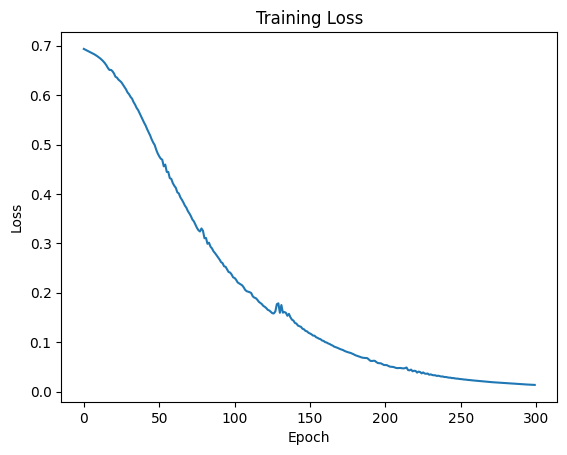

In [ ]:
# Plot the loss history
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [ ]:
X_test[0] 

3129    0.0
4633    0.0
702     0.0
3107    0.0
2206    0.0
       ... 
4945    0.0
1278    0.0
2978    0.0
2010    0.0
2281    0.0
Name: 0, Length: 1584, dtype: float64

In [ ]:
## make prediction on test data
best_rnn.eval()

test_predict, _ = best_rnn(X_test_tensor, hidden_state)
test_predict_cpu = test_predict.cpu().detach().numpy()

In [ ]:
test_predict_cpu.shape 

(1584, 1, 1)

In [ ]:
## compute confusion matrix
threshold = 0.5
binary_predictions = (test_predict.view(-1) >= threshold).int()
from sklearn.metrics import confusion_matrix

y_true = y_test_tensor.cpu().numpy()
y_pred = binary_predictions.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)
cm

array([[585, 206],
       [255, 538]])

In [ ]:
# Print the evaluation metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)


print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("specificity:", specificity)

Precision: 0.7231182795698925
Recall: 0.6784363177805801
Accuracy: 0.7089646464646465
F1-score: 0.7000650618087183
specificity: 0.7395701643489254
